In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [22]:
pd.read_excel("Champo_Carpets_ML.xlsx",sheet_name= "Raw Data-Order and Sample") 



,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,6.0000,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.0000
1,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,9.0000,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.0000
2,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,54.0000,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.0000
3,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,5,54.0000,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.0000
4,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,5,71.2500,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18950,Area Wise,Sample,T-2,ITALY,S 1278,2020-02-13,Mtr,1,0.2500,0.00,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY ALL CUT,MONOGRAMMA,GREEN,REC,2.7778
18951,Area Wise,Sample,T-2,ITALY,S 1278,2020-02-13,Mtr,1,0.2500,0.00,HAND TUFTED,TUFTED 60C ALL CUT,MONOGRAMMA,BLACK/BLACK,REC,2.7778
18952,Area Wise,Sample,T-2,ITALY,S 1278,2020-02-13,Mtr,1,0.2500,0.00,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY ALL CUT,MONOGRAMMA,IVORY,REC,2.7778
18953,Area Wise,Sample,A-9,USA,S 1280,2020-02-14,Ft,2,6.0000,0.00,HAND TUFTED,TUFTED 30C,9164 B,IVORY BLUE,REC,6.0000


In [23]:
#Week 4 – Case Study – Champo Carpets
#1. Using data visualization, the key insights achieved with exploratory data analysis are: 

In [24]:
Champo_Carpets=pd.read_excel("Champo_Carpets_ML.xlsx",sheet_name= "Raw Data-Order and Sample") 

In [25]:
Champo_Carpets.shape


(18955, 16)

<Axes: xlabel='OrderType', ylabel='count'>

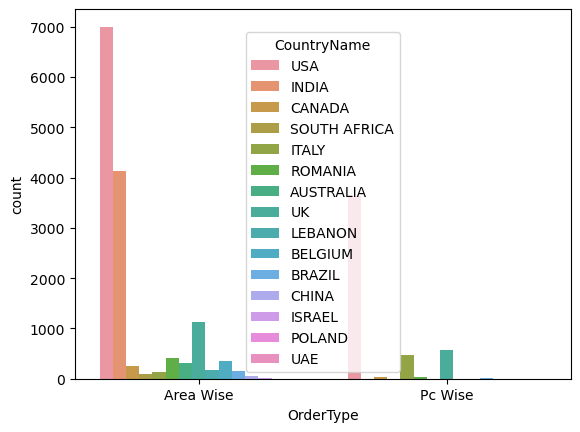

In [26]:
##•The USA has the largest Area Wise and PC Wise
sns.countplot(x=Champo_Carpets["OrderType"], hue =Champo_Carpets ["CountryName"], data=Champo_Carpets)

<Axes: xlabel='TotalArea', ylabel='CountryName'>

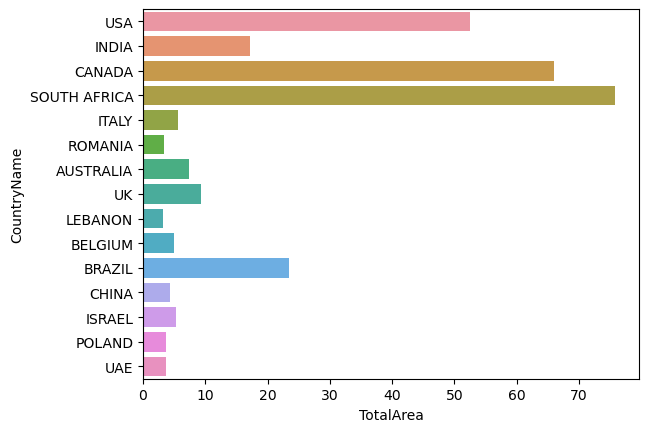

In [27]:
#South Africa has the largest Total Area.
sns.barplot(x=Champo_Carpets['TotalArea'], y=Champo_Carpets['CountryName'], errorbar=None, data=Champo_Carpets)

<Axes: xlabel='QtyRequired', ylabel='CountryName'>

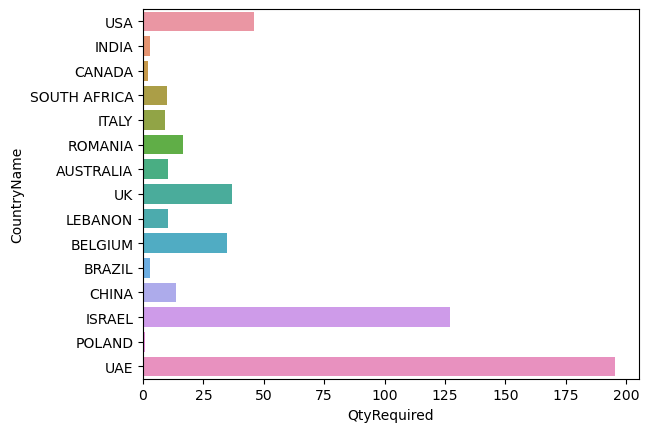

In [28]:
#The UAE applied for the most quantity than other countries
sns.barplot(x=Champo_Carpets['QtyRequired'], y=Champo_Carpets['CountryName'], errorbar=None ,data=Champo_Carpets)

<Axes: xlabel='Amount', ylabel='CountryName'>

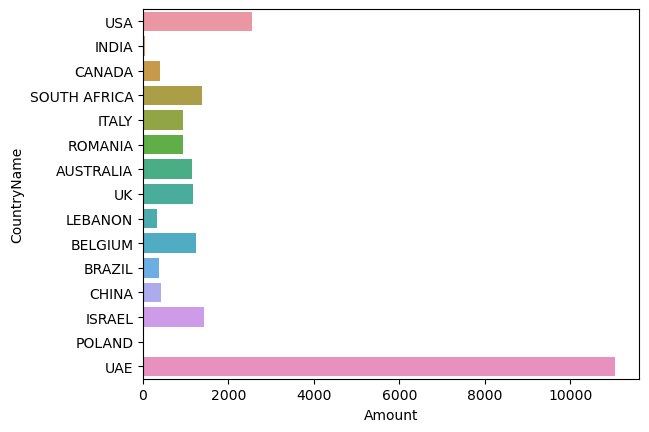

In [29]:
#The UAE paid the highest amount of money
sns.barplot(x=Champo_Carpets['Amount'], y=Champo_Carpets['CountryName'],errorbar=None, data=Champo_Carpets)

<Axes: xlabel='Count', ylabel='ITEM_NAME'>

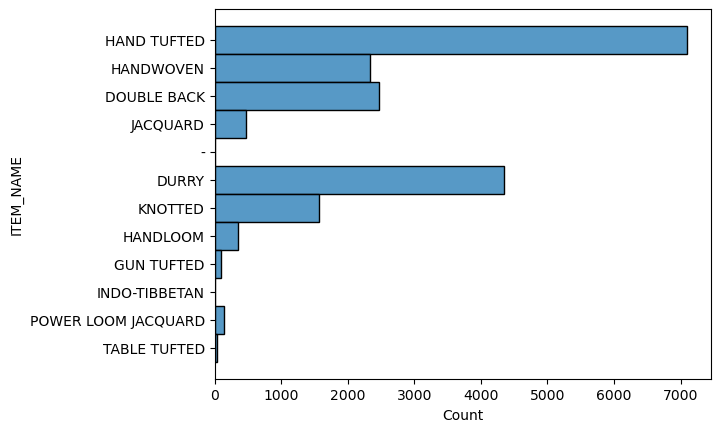

In [30]:
#The Hand-tufted was the highest item, and the smallest item made was the Table-tufted by Champo carpet.
sns.histplot(data=Champo_Carpets, y="ITEM_NAME")

<Axes: xlabel='CustomerCode', ylabel='count'>

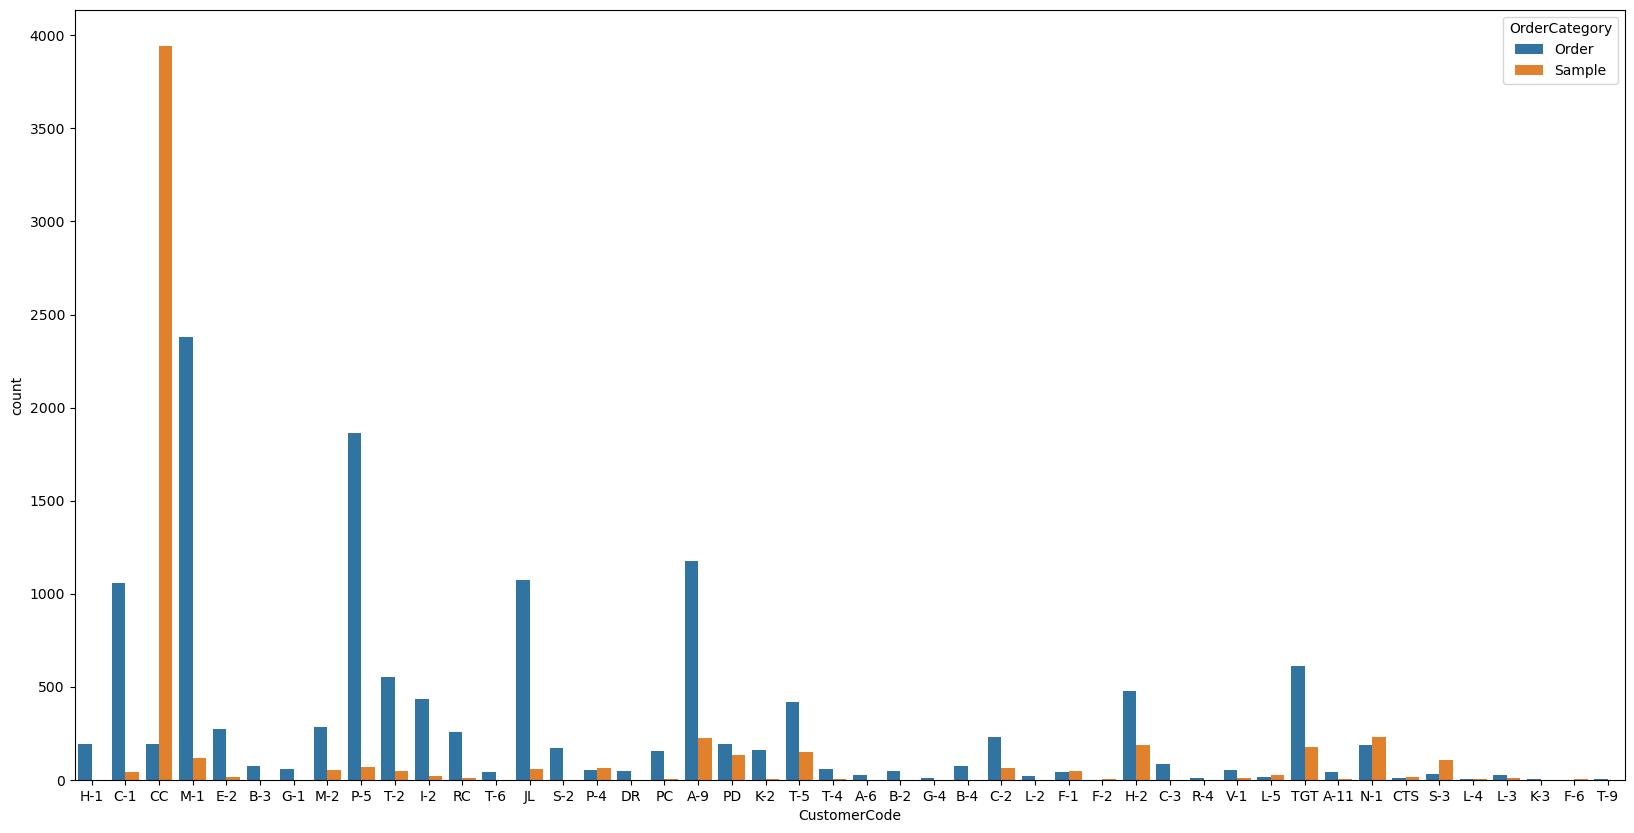

In [31]:
#The Customer Code that ordered for the Order category is more than the Sample Order Category.
plt.figure(figsize= (20,10))
sns.countplot(x=Champo_Carpets["CustomerCode"], hue =Champo_Carpets ["OrderCategory"], data=Champo_Carpets)


<Axes: xlabel='UnitName', ylabel='QtyRequired'>

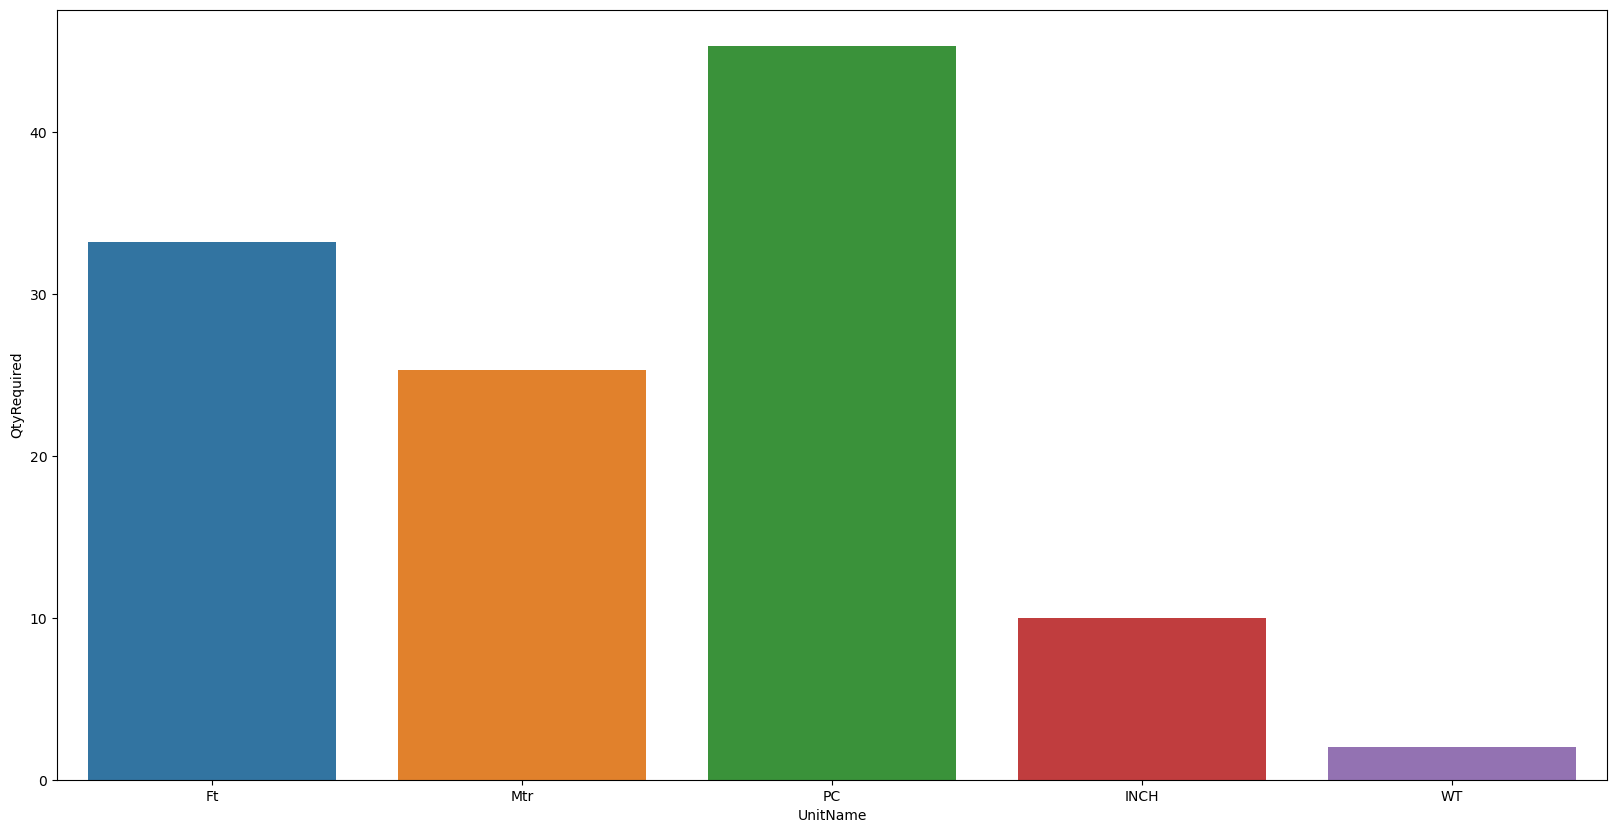

In [32]:
#The PC has the highest quantity required.
plt.figure(figsize= (20,10))
sns.barplot(x=Champo_Carpets['UnitName'], y=Champo_Carpets['QtyRequired'],errorbar=None, data=Champo_Carpets)

<Axes: xlabel='Amount', ylabel='Density'>

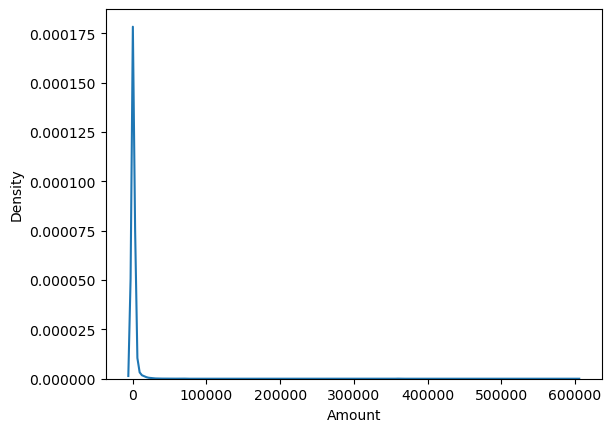

In [33]:
#The amount is increasing, and the number of countries requesting quantities of items is reducing (density)
sns.kdeplot(x=Champo_Carpets['Amount'], data=Champo_Carpets)

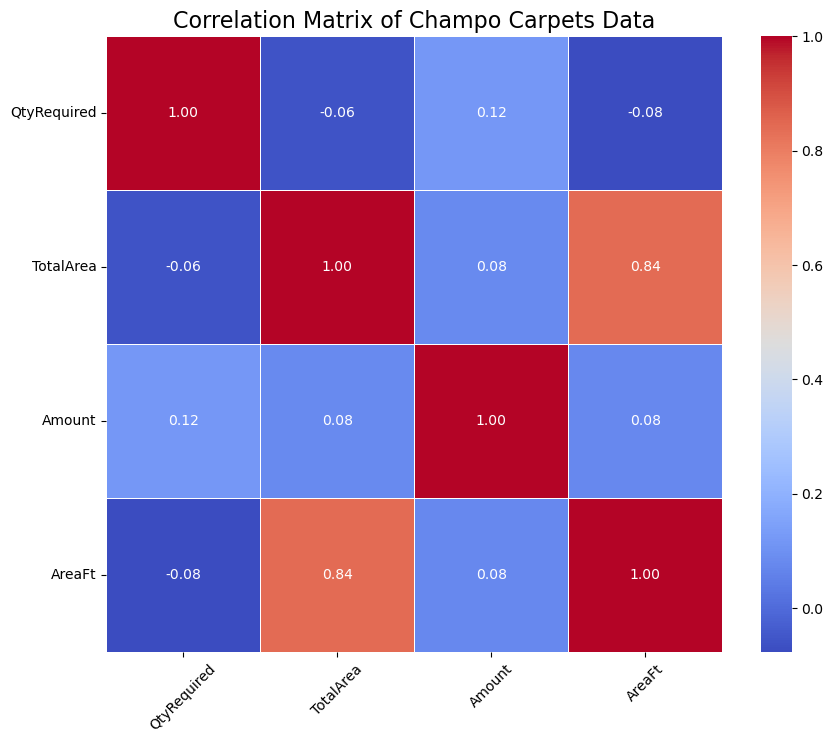

In [34]:
# Filter out non-numeric columns
numeric_df = Champo_Carpets.select_dtypes(include=[float, int])
# Compute the correlation matrix
correlation = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with a colorbar and annotations
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=0.5, fmt='.2f')

# Add title and labels
plt.title('Correlation Matrix of Champo Carpets Data', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()